Mental Health Insights: Vulnerable Cancer Patients

About dataset: We collected over 10,087 posts from cancer patients and their caregivers on platforms like Reddit, Daily Strength, and the Health Board. The posts were related to five types of cancer: brain, colon, liver, leukemia, and lung cancer. Two team members scored each post based on the emotions expressed, using a scale from -2 to 1. Negative scores (-1 or -2) were given for posts showing grief or suffering, positive scores (1) for happy emotions like relief or accomplishment, and posts with no emotion received a score of 0 and were considered neutral. This analysis aims to understand the emotional aspects of cancer patients posts for a mental health study.

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('Mental Health Dataset.csv')
#displaying first 5 rows with column names
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [3]:
df.shape

(10392, 3)

In [4]:
df.isna().sum() #to check if there is any mising values

posts        1
predicted    0
intensity    0
dtype: int64

In [5]:
print(df[df['posts'].isnull()]) #to find the index where missing value is

     posts predicted  intensity
3979   NaN   neutral          0


In [6]:
df.drop(index=3979, axis=0, inplace=True) #reoving the entry wuth missing value

In [7]:
df.isna().sum() #now there's no missing values

posts        0
predicted    0
intensity    0
dtype: int64

In [8]:
df.shape

(10391, 3)

In [9]:
df.intensity.value_counts()

intensity
 0    4374
-1    4112
-2    1155
 1     750
Name: count, dtype: int64

In [10]:
df.predicted.value_counts()

predicted
neutral          4374
negative         4112
very negative    1155
positive          750
Name: count, dtype: int64

The intensity and predicted value counts are equal, so no mismatch is assumed.

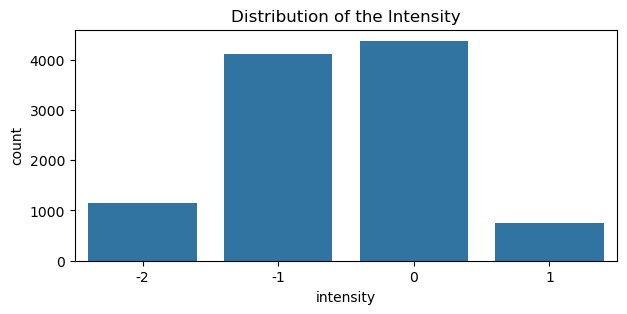

In [11]:
fig = plt.figure(figsize=(7,3))
sns.countplot(x=df['intensity'])
plt.title('Distribution of the Intensity')        
plt.show()

From the above plot, negative and neutral posts are most frequent compared to very negative and positive posts.

In [12]:
#Mapping predicted columns to positive values
df['labels'] = df['predicted'].map({
    'very negative': 0,
    'negative': 1,
    'neutral': 2,
    'positive': 3
})

In [13]:
df.labels.value_counts() #check whether the counts are same

labels
2    4374
1    4112
0    1155
3     750
Name: count, dtype: int64

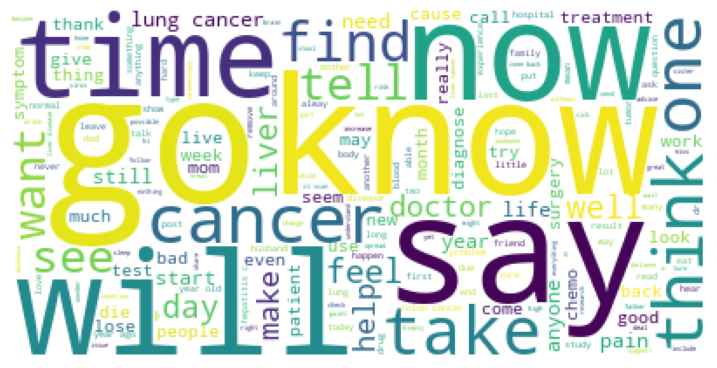

In [14]:
# WordCloud
from wordcloud import WordCloud, STOPWORDS
all_text = " ".join(df['posts'])

wc = WordCloud(stopwords = STOPWORDS, background_color='white').generate(all_text)
plt.figure(figsize = (9,7))
plt.imshow(wc)
plt.axis('off')
plt.show()

WordCloud gives a visual representation of the words where size of each word is directly proportional to its frequency

In [15]:
#loading gensim for vectorization
import gensim.downloader as api

wv = api.load("word2vec-google-news-300")

word2vec-google-news-300: Pre-trained vectors trained on a part of the Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases.

In [16]:
#defining a function for preprocessing and vectorization
nlp = spacy.load("en_core_web_lg")
def preprocess_and_vectorize(text):
    doc = nlp(text)
    clean_content = []
    #creating a list without stop words, punctuation marks and base words
    for token in doc:
        if not token.is_stop and not token.is_punct:
            clean_content.append(token.lemma_)
    if clean_content:
        return wv.get_mean_vector(clean_content)
    else:
        return np.zeros(300)

In [17]:
# applying preprocessing and vectorization function
df['posts_clean'] = df['posts'].apply(preprocess_and_vectorize)

In [18]:
df['posts'][0]

'I know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but I quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then I have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and I tell my boss that he was sick and not to be surpise if I call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by t

In [19]:
df['posts_clean'][0]

array([ 4.26550629e-03,  2.47324351e-02, -2.23310129e-03,  4.48947959e-02,
       -3.61547545e-02,  1.19903814e-02,  3.11830938e-02, -2.72322372e-02,
        2.98946537e-02,  1.31317507e-02, -1.57674658e-03, -4.14954349e-02,
       -2.14441400e-02, -4.15966334e-03, -4.52067219e-02,  4.23973203e-02,
        2.09815167e-02,  5.32158613e-02,  9.82849766e-03, -2.48275213e-02,
       -5.59105724e-03,  2.17545833e-02,  3.75772566e-02,  6.70249248e-03,
        2.40750350e-02, -4.05340921e-03, -2.21614260e-02, -2.40744278e-03,
        1.43268527e-02, -2.15871092e-02, -1.59643199e-02,  8.88072420e-03,
       -1.73751302e-02, -2.68567670e-02, -2.33760383e-02, -1.30349898e-03,
        2.09456477e-02,  4.74388339e-03,  8.04327056e-03,  3.88185866e-02,
        3.20215374e-02, -3.15119550e-02,  5.10431305e-02, -1.77012309e-02,
       -6.81100693e-03, -5.91062149e-03, -1.06111113e-02, -1.79531414e-03,
       -1.10037886e-02,  1.41214235e-02, -1.24179590e-02,  2.04154234e-02,
       -9.52052698e-03,  

In [20]:
len(df['posts_clean'][0]) #now the length of each post will be 300

300

In [21]:
#Input and output variables
X = df['posts_clean']
y = df['labels']

In [22]:
#splitting into training and test sets in the ratio 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)
len(X_train), len(X_test), len(y_train), len(y_test)

(7273, 3118, 7273, 3118)

In [23]:
#Reshaping X_train and X_test so that it fits into models
print("Before reshaping: ")
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

print("After reshaping: ")
print("X_train shape: ", X_train_2d.shape)
print("X_test shape: ", X_test_2d.shape)

Before reshaping: 
X_train shape:  (7273,)
X_test shape:  (3118,)
After reshaping: 
X_train shape:  (7273, 300)
X_test shape:  (3118, 300)


Trying out different classification methods to find out which works best for the given dataset

In [24]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score

In [25]:
#ANN

import tensorflow as tf
from tensorflow.keras import models, layers

ann = models.Sequential([
        layers.Flatten(input_shape=(300,)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(800, activation='relu'),
        layers.Dense(400, activation='relu'),
        layers.Dense(4, activation='softmax')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train_2d, y_train, epochs=10)

Epoch 1/10
228/228 [==============================] - 2s 6ms/step - loss: 0.8384 - accuracy: 0.6321
Epoch 2/10
228/228 [==============================] - 1s 5ms/step - loss: 0.7165 - accuracy: 0.7003
Epoch 3/10
228/228 [==============================] - 1s 5ms/step - loss: 0.6798 - accuracy: 0.7177
Epoch 4/10
228/228 [==============================] - 1s 5ms/step - loss: 0.6457 - accuracy: 0.7379
Epoch 5/10
228/228 [==============================] - 1s 5ms/step - loss: 0.6194 - accuracy: 0.7466
Epoch 6/10
228/228 [==============================] - 1s 5ms/step - loss: 0.6029 - accuracy: 0.7562
Epoch 7/10
228/228 [==============================] - 1s 5ms/step - loss: 0.5777 - accuracy: 0.7617
Epoch 8/10
228/228 [==============================] - 1s 5ms/step - loss: 0.5633 - accuracy: 0.7723
Epoch 9/10
228/228 [==============================] - 1s 5ms/step - loss: 0.5429 - accuracy: 0.7815
Epoch 10/10
228/228 [==============================] - 1s 5ms/step - loss: 0.5256 - accuracy: 0.7865

In [26]:
y_pred = ann.predict(X_test_2d)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))
ANNaccuracy = accuracy_score(y_test, y_pred_classes)

98/98 [==============================] - 0s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.59      0.66       347
           1       0.65      0.85      0.74      1234
           2       0.87      0.66      0.75      1312
           3       0.44      0.43      0.44       225

    accuracy                           0.71      3118
   macro avg       0.68      0.63      0.65      3118
weighted avg       0.74      0.71      0.71      3118



In [27]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
LRclassifier=LogisticRegression(max_iter=500)
LRclassifier.fit(X_train_2d, y_train)
y_pred_LR=LRclassifier.predict(X_test_2d)
print("Classification Report: \n", classification_report(y_test, y_pred_LR))
LRaccuracy = accuracy_score(y_test, y_pred_LR)

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.39      0.49       347
           1       0.61      0.76      0.68      1234
           2       0.75      0.77      0.76      1312
           3       0.50      0.02      0.03       225

    accuracy                           0.67      3118
   macro avg       0.63      0.48      0.49      3118
weighted avg       0.66      0.67      0.64      3118



In [28]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier()
KNNclassifier.fit(X_train_2d, y_train)
y_pred_KNN= KNNclassifier.predict(X_test_2d)
print("Classification Report: \n", classification_report(y_test, y_pred_KNN))
KNNaccuracy = accuracy_score(y_test, y_pred_KNN)

Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.63      0.55       347
           1       0.56      0.78      0.65      1234
           2       0.82      0.54      0.65      1312
           3       0.38      0.15      0.21       225

    accuracy                           0.62      3118
   macro avg       0.56      0.53      0.52      3118
weighted avg       0.65      0.62      0.61      3118



In [29]:
#Support vector machine
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='poly')
SVCclassifier.fit(X_train_2d, y_train)
y_pred_SVC= SVCclassifier.predict(X_test_2d)
print("Classification Report: \n", classification_report(y_test, y_pred_SVC))
SVCaccuracy = accuracy_score(y_test, y_pred_SVC)

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.63      0.64       347
           1       0.68      0.79      0.73      1234
           2       0.80      0.79      0.80      1312
           3       0.56      0.17      0.26       225

    accuracy                           0.73      3118
   macro avg       0.68      0.59      0.61      3118
weighted avg       0.72      0.73      0.71      3118



In [30]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train_2d, y_train)
y_pred_NB= NBclassifier.predict(X_test_2d)
print("Classification Report: \n", classification_report(y_test, y_pred_NB))
NBaccuracy = accuracy_score(y_test, y_pred_NB)

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.80      0.56       347
           1       0.61      0.62      0.61      1234
           2       0.78      0.56      0.65      1312
           3       0.20      0.25      0.22       225

    accuracy                           0.59      3118
   macro avg       0.51      0.56      0.51      3118
weighted avg       0.63      0.59      0.60      3118



In [31]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_2d, y_train)
y_pred_gbc= gbc.predict(X_test_2d)
print("Classification Report: \n", classification_report(y_test, y_pred_gbc))
GBaccuracy = accuracy_score(y_test, y_pred_gbc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.59      0.61       347
           1       0.67      0.76      0.71      1234
           2       0.78      0.78      0.78      1312
           3       0.54      0.20      0.30       225

    accuracy                           0.71      3118
   macro avg       0.66      0.58      0.60      3118
weighted avg       0.70      0.71      0.70      3118



In [32]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train_2d, y_train)
y_pred_DT= DTclassifier.predict(X_test_2d)
print("Classification Report: \n", classification_report(y_test, y_pred_DT))
DTaccuracy = accuracy_score(y_test, y_pred_DT)

Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.44      0.44       347
           1       0.56      0.55      0.55      1234
           2       0.66      0.64      0.65      1312
           3       0.15      0.18      0.16       225

    accuracy                           0.55      3118
   macro avg       0.45      0.45      0.45      3118
weighted avg       0.56      0.55      0.55      3118



In [33]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train_2d, y_train)
y_pred_RF= RFclassifier.predict(X_test_2d)
print("Classification Report: \n", classification_report(y_test, y_pred_RF))
RFaccuracy = accuracy_score(y_test, y_pred_RF)

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.53      0.59       347
           1       0.64      0.74      0.69      1234
           2       0.75      0.79      0.77      1312
           3       0.70      0.08      0.15       225

    accuracy                           0.69      3118
   macro avg       0.69      0.54      0.55      3118
weighted avg       0.69      0.69      0.67      3118



In [34]:
data = {'Model':['ANN', 'LR','KNN', 'SVC', 'NB', 'GB', 'DT', 'RF'],
        'Accuracies':[ANNaccuracy*100, LRaccuracy*100, KNNaccuracy*100, SVCaccuracy*100, NBaccuracy*100, GBaccuracy*100, DTaccuracy*100, RFaccuracy*100]}
model_acc_df = pd.DataFrame(data)
print(model_acc_df)

  Model  Accuracies
0   ANN   71.199487
1    LR   66.998076
2   KNN   61.738294
3   SVC   72.578576
4    NB   58.691469
5    GB   71.007056
6    DT   54.971135
7    RF   69.243105


In [35]:
#from the above analyis, it is seen that the accuracy of SVC is higher than all other models.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_SVC)
cm

array([[ 218,  118,    5,    6],
       [  69,  969,  185,   11],
       [  16,  245, 1038,   13],
       [  26,   95,   66,   38]], dtype=int64)

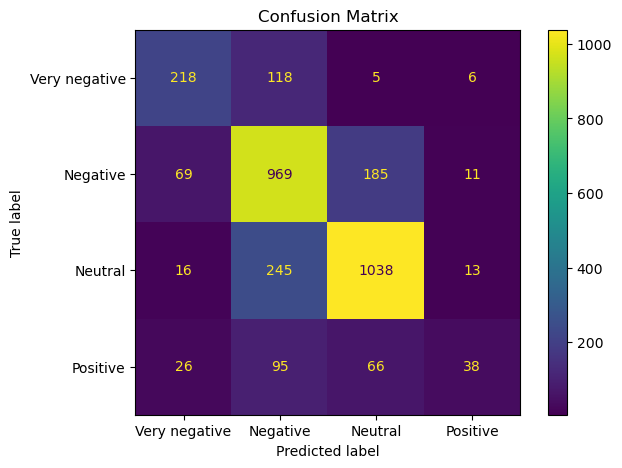

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(7,5), dpi=100)
display = ConfusionMatrixDisplay(cm, display_labels=['Very negative', 'Negative', 'Neutral', 'Positive'])
ax.set(title='Confusion Matrix')
display.plot(ax=ax);

From the above confusion matrix, it is seen that many positive and very negative posts are predicted wrongly.

In [37]:
#testing the SVC model with one random post
test = df['posts'][100]
test

'my good friend who have been battle chronic leukemia for over a year along with a about of mrsa receive a call from her father yesterday he was diagnose yesterday morning with esophageal cancer emotionally she is in terrible shape as they have not been able to get she in remission she is extremely close to her father as he have been her true liferaft throughtout this last year and now this blow I am afraid for both of they the prognosis for esophageal cancer is never good and if she lose he she will probably give up her fight our father can and do work miracle please add jennifer and john to your prayer list thank you dee'

In [38]:
test_clean = preprocess_and_vectorize(test)

In [39]:
df['predicted'][100]

'negative'

In [40]:
test_reshaped = test_clean.reshape(1,-1)
test_reshaped.shape

(1, 300)

In [41]:
prediction = SVCclassifier.predict(test_reshaped)
prediction

array([1], dtype=int64)

In [42]:
#1 means negative. So for 100th post, the prediction is right

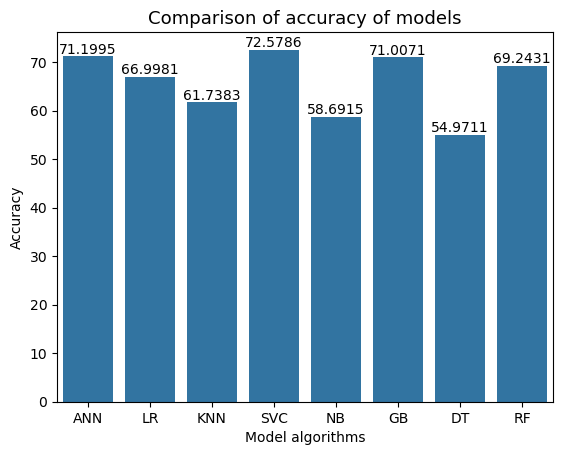

In [43]:
#Plotting model accuracies against models
plt.figure()
ax = sns.barplot(x='Model', y='Accuracies', data=model_acc_df)
plt.title('Comparison of accuracy of models',fontsize=13)
plt.xlabel('Model algorithms', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Conclusion:

From the above analysis, Support vector classifier, Gradient Boosting classifier and neural network model works best for the given dataset with good accuracies